## Pandas - Matplotlib Researcher's Toolkit



## Intro into Pandas



In [17]:
from pandas import DataFrame, read_csv
import pandas as pd



names = ['Bob','Jessica','Mary','John','Mel','Gary','Steve','Ellie','Nora','David','Fran','Gus','Pete']
births = [968, 155, 77, 578, 973, 539,225,179,839,401,199,88,472]

BabyDataSet = list(zip(names,births)) # zip pairs entries together and list combines the entries to a list

print(BabyDataSet)

#The DataFrame attribute of pandas reorganizes the list into a tabular panda object 
#similar to an sql table or an excel spreadsheet. 
df = pd.DataFrame(data = BabyDataSet, columns=['Names', 'Births'])
print(df)

[('Bob', 968), ('Jessica', 155), ('Mary', 77), ('John', 578), ('Mel', 973), ('Gary', 539), ('Steve', 225), ('Ellie', 179), ('Nora', 839), ('David', 401), ('Fran', 199), ('Gus', 88), ('Pete', 472)]
      Names  Births
0       Bob     968
1   Jessica     155
2      Mary      77
3      John     578
4       Mel     973
5      Gary     539
6     Steve     225
7     Ellie     179
8      Nora     839
9     David     401
10     Fran     199
11      Gus      88
12     Pete     472


In [4]:
#We can now save the content as a standard tabular data format (csv)
df.to_csv('births1880.csv',index=False,header=False)

#We can also read back from the same file into a panda object
df = pd.read_csv(r'births1880.csv')

print(df)



        Bob  968
0   Jessica  155
1      Mary   77
2      John  578
3       Mel  973
4      Gary  539
5     Steve  225
6     Ellie  179
7      Nora  839
8     David  401
9      Fran  199
10      Gus   88
11     Pete  472


In [5]:
print('Wrong header. read_cvs treated the first record as the header')
print('set the header to null')


df = pd.read_csv(r'births1880.csv',header=None)
print(df)

print('Now we have the right data but no header')


Wrong header. read_cvs treated the first record as the header
set the header to null
          0    1
0       Bob  968
1   Jessica  155
2      Mary   77
3      John  578
4       Mel  973
5      Gary  539
6     Steve  225
7     Ellie  179
8      Nora  839
9     David  401
10     Fran  199
11      Gus   88
12     Pete  472
Now we have the right data but no header
Label the headers
      Names  Births
0       Bob     968
1   Jessica     155
2      Mary      77
3      John     578
4       Mel     973
5      Gary     539
6     Steve     225
7     Ellie     179
8      Nora     839
9     David     401
10     Fran     199
11      Gus      88
12     Pete     472
This looks like the table we need


In [6]:
print('Label the headers')

df = pd.read_csv(r'births1880.csv', names=['Names','Births'])

print(df)
print('This looks like the table we need')

Label the headers
      Names  Births
0       Bob     968
1   Jessica     155
2      Mary      77
3      John     578
4       Mel     973
5      Gary     539
6     Steve     225
7     Ellie     179
8      Nora     839
9     David     401
10     Fran     199
11      Gus      88
12     Pete     472
This looks like the table we need


In [48]:
df.head(1)

,Names,Births
0,Bob,968


In [49]:
df.shape

(13, 2)

In [50]:
df.columns

Index(['Names', 'Births'], dtype='object')

In [51]:
df.index

RangeIndex(start=0, stop=13, step=1)

In [55]:
df[5:8]

,Names,Births
5,Gary,539
6,Steve,225
7,Ellie,179


In [56]:
df[df['Births'] > 100]

,Names,Births
0,Bob,968
1,Jessica,155
3,John,578
4,Mel,973
5,Gary,539
6,Steve,225
7,Ellie,179
8,Nora,839
9,David,401
10,Fran,199


In [58]:
df.describe()

,Births
count,13.000000
mean,437.923077
std,324.388261
min,77.000000
25%,179.000000
50%,401.000000
75%,578.000000
max,973.000000


In [57]:
df[df['Births'] > 100].describe()


,Births
count,11.000000
mean,502.545455
std,310.497138
min,155.000000
25%,212.000000
50%,472.000000
75%,708.500000
max,973.000000


In [63]:
df.loc[df['Births'] > 300]

,Names,Births
0,Bob,968
3,John,578
4,Mel,973
5,Gary,539
8,Nora,839
9,David,401
12,Pete,472


In [69]:
df_indexed = df.set_index('Names')
mask = df_indexed%2==0
df_indexed[mask.any(axis=1)]

,Births
Names,
Bob,968
John,578
Gus,88
Pete,472


In [78]:
df.iloc[:3]

,Names,Births
0,Bob,968
1,Jessica,155
2,Mary,77


In [74]:
df_indexed%2==0

,Births
Names,
Bob,True
Jessica,False
Mary,False
John,True
Mel,False
Gary,False
Steve,False
Ellie,False
Nora,False


In [87]:
df['Births offset']=df['Births']-df['Births'].mean()
df

,Names,Births,Births offset
0,Bob,968,530.076923
1,Jessica,155,-282.923077
2,Mary,77,-360.923077
3,John,578,140.076923
4,Mel,973,535.076923
5,Gary,539,101.076923
6,Steve,225,-212.923077
7,Ellie,179,-258.923077
8,Nora,839,401.076923
9,David,401,-36.923077


In [95]:
df['Births_fraction']= df['Births'] > df.Births.quantile(.50)
df

,Names,Births,Births offset,Births_fraction
0,Bob,968,530.076923,True
1,Jessica,155,-282.923077,False
2,Mary,77,-360.923077,False
3,John,578,140.076923,True
4,Mel,973,535.076923,True
5,Gary,539,101.076923,True
6,Steve,225,-212.923077,False
7,Ellie,179,-258.923077,False
8,Nora,839,401.076923,True
9,David,401,-36.923077,False


In [7]:
print('Lets do something else with this tabulated data')
print('Sort the dataframe and select the top row')
Sorted1=df.sort_values(['Births'], ascending=False)
#Sorted2=df.sort_values(by='Births', ascending=False)
#Sorted.head(1)
print(Sorted1)


Lets do something else with this tabulated data
Sort the dataframe and select the top row
      Names  Births
4       Mel     973
0       Bob     968
8      Nora     839
3      John     578
5      Gary     539
12     Pete     472
9     David     401
6     Steve     225
10     Fran     199
7     Ellie     179
1   Jessica     155
11      Gus      88
2      Mary      77


In [8]:
print('Use the max() attribute to find the maximum value')
MaxValue=df['Births'].max()
print('MaxValue is ',MaxValue)

Use the max() attribute to find the maximum value
MaxValue is  973


In [9]:
print('Use the min() attribute to find the min value')
MinValue=df['Births'].min()
print('MinValue is ',MinValue)

Use the min() attribute to find the min value
MinValue is  77


In [10]:
print('Convert a column to an array')
print(df['Names'].values)


Convert a column to an array
['Bob' 'Jessica' 'Mary' 'John' 'Mel' 'Gary' 'Steve' 'Ellie' 'Nora' 'David'
 'Fran' 'Gus' 'Pete']


In [11]:
print('Convert a column to an array')
print(df['Births'].values)


Convert a column to an array
[968 155  77 578 973 539 225 179 839 401 199  88 472]


In [12]:
print('Reference the second entry')
print(df['Names'][1:2].values,df['Births'][1:2].values)

Reference the second entry
['Jessica'] [155]


In [13]:
df.describe()

,Births
count,13.000000
mean,437.923077
std,324.388261
min,77.000000
25%,179.000000
50%,401.000000
75%,578.000000
max,973.000000


In [14]:
print('Apply a booleen mask on the Births column when compared to the MaxValue')
mask = df['Births']==MaxValue
print(mask)
print('Find the name associated with the maximum value')
MaxName = df['Names'][mask].values
print('Name at Max Value is ',MaxName)



Apply a booleen mask on the Births column when compared to the MaxValue
0     False
1     False
2     False
3     False
4      True
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
Name: Births, dtype: bool
Find the name associated with the maximum value
Name at Max Value is  ['Mel']


## Intro to Matplotlib

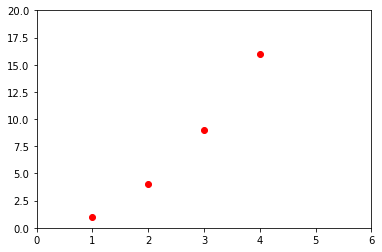

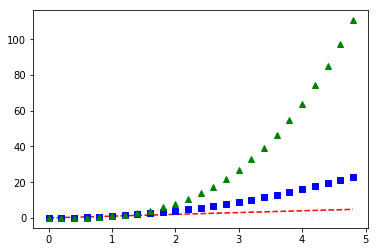

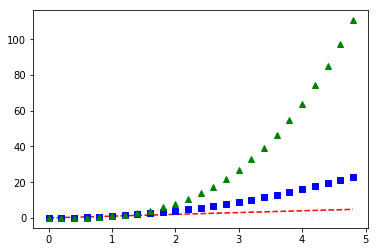

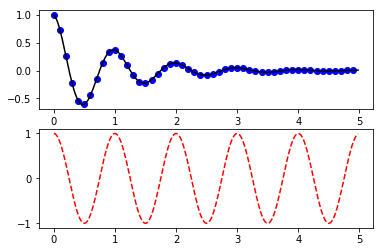

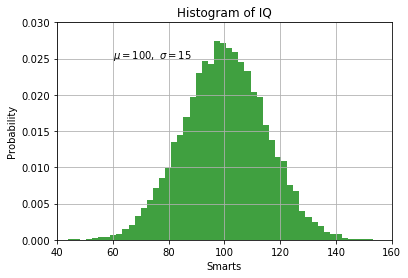

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import mpl_toolkits.mplot3d.axes3d as axes3d

#Simple Graph
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

#Multiple plots
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()


#Create multiple panels of plots (subplots) 
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

#create and plot histogram of data
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

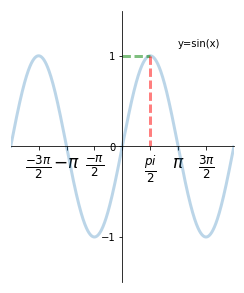

In [38]:
#Plot sin with labels and reference lines
fig = plt.figure(figsize=(4, 5))

ax = fig.add_subplot(111)

x = np.arange(-2*np.pi, 2*np.pi, 0.01)
y = np.sin(x)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.plot(x, y,linewidth=3, alpha=0.3)

ax.plot([0, np.pi/2], [1, 1], ls="--", color="green", linewidth=3,alpha=0.5)
ax.plot([np.pi/2, np.pi/2], [1, 0], ls="--", color="red", linewidth=3,alpha=0.5)

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')


ax.set_xlim(-2*np.pi, 2*np.pi)

xticker = np.arange(-np.pi-np.pi/2, np.pi+np.pi, np.pi/2)
xlabels = [r"$\frac{-3\pi}{2}$", r"${-\pi}$",r"$\frac{-\pi}{2}$","",r"$\frac{pi}{2}$",r"${\pi}$",r"$\frac{3\pi}{2}$"]

ax.set_xticks(xticker)
ax.set_xticklabels(xlabels, size=17)

ax.text(np.pi, 1.1, "y=sin(x)")

ax.set_ylim(-1.5, 1.5)
yticker = np.arange(-1, 2, 1)
ax.set_yticks(yticker)

plt.show()

## Use Pandas and Matlplotlib to plot tabulated data

In [30]:
# Refer to dataFrame, df, we created before

Create a simple graph object


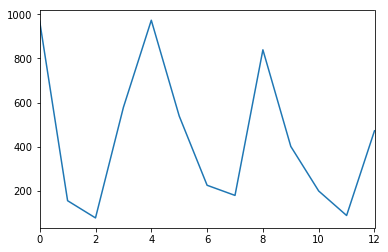

In [32]:
#Create a graph object
print('Create a simple graph object')
df['Births'].plot()
plt.show()

In [33]:

# Text to display on graph
print('Construct a string to display on the graph')
Text = str(MaxValue) + " - " + MaxName
print(Text)

Construct a string to display on the graph
['973 - Mel']


In [34]:
# Add text to graph
print('Annonate the graph')
plt.annotate(Text, xy=(1, MaxValue), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')


Annonate the graph


Show the graph


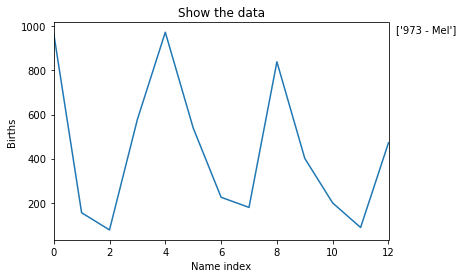

In [35]:
df['Births'].plot()
plt.xlabel('Name index')
plt.ylabel('Births')
plt.title('Show the data')
print('Show the graph')

plt.show()
#Uncomment the following to save it as a png file
#plt.savefig('mygraph.png')

In [36]:
print("Create a histogram of 5 bins measuring the frequency of births")

Create a histogram of 5 bins measuring the frequency of births


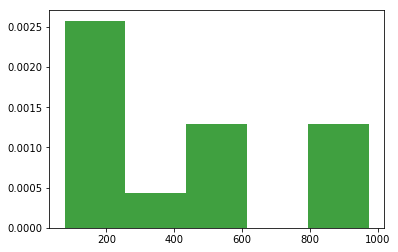

In [37]:
n, bins, patches = plt.hist(df['Births'], 5, normed=1, facecolor='g', alpha=0.75)
plt.show()